<a href="https://colab.research.google.com/github/nahidame/QuaziNahida.github.io/blob/main/6_Project_Credit_Card_Users_Churn_Prediction_Quazi_Nahida_Sultana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h2><center>AllLife Bank Customer Segmentation - Project 6 </center></h2></b> 

### **Description**

### **Background & Context**

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help


### **Objective**

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


### **Key Question:**

> **1.** How many different segments of customers are there? <br> 
> **2.** How are these segments different from each other? <br>
> **3.**What are your recommendations to the bank on how to better market to and service these customers? <br> 
 

### **Data Description:**

The detailed data dictionary is given below.- <br>

> **1.** Sl_No: Primary key of the records <br> 
  **2.** Customer Key: Customer identification number <br>
  **3.** Average Credit Limit: Average credit limit of each customer for all credit cards <br>
  **4.** Total credit cards: Total number of credit cards possessed by the customer <br>
  **5.** Total visits bank: Total number of visits that customer made (yearly) personally to the bank <br>
  **6.** Total visits online: Total number of visits or online logins made by the customer (yearly) <br>
  **7.** Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)<br>


### **Importing the necessary packages**

Let's start by importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist
# to compute distances
from scipy.spatial.distance import cdist


# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

**Importing the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/DATA SCIENCE 2022/13_HierarchicalClustering_and_PCA/Credit+Card+Customer+Data.xlsx" 
data=pd.read_excel(path)


## **Data Overview**

**Checking the data Type of the columns for the dataset**

In [ ]:
# let's check the data type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are 660 observations and 7 columns in the dataset.
- All columns have 660 non-null values i.e. there are no missing values.
- 'All columns are of int64 data type.
- There are no missing values

**View the first and last 5 rows of the dataset**

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [ ]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [ ]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


In [ ]:
data.shape

(660, 7)

- There are 660 unique observations and 7 columns in the data.

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [ ]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There is no missing value in the data

**We won't need Sl_No for analysis, so let's drop this column.**

In [ ]:
df.drop("Sl_No", axis=1, inplace=True)

In [ ]:
# let's check for duplicate observations
df.duplicated().sum()

0

- There is no duplicated records

### **Statistical summary**

In [ ]:
df.describe()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


**Observations**

- Credit limit average is around 35K with 50% of customers having a credit limit less than 18K, which implies a high positive skewness.
- Looking at standard deviation, we can see a considerably high variation in credit limits as well.
- On average, credit cards owned by each customer are ~5. Some customers have maximum 10.
- On average, most customer interactions are through calls, then online. 
- Also, some customers never contacted/visited the bank.

In [ ]:
# checking missing values
df.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

## **Data Pre-Processing**

In [ ]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has repeated values.

In [ ]:
df[df['Customer Key'].duplicated(keep=False)].sort_values('Customer Key',ascending=True)

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


**Observation**

- No duplicates found based on serial number
- But with same customer key there are 5 sets of duplicates but apart of customer key nothing else is same. Other columns have different number. Not sure if these are really duplicates.
- For now not deleting any duplicate rows

In [ ]:
df.drop("Customer Key", axis=1, inplace=True)

## **Exploratory Data Analysis**

### Univariate analysis

***Histogram_Box plot***

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

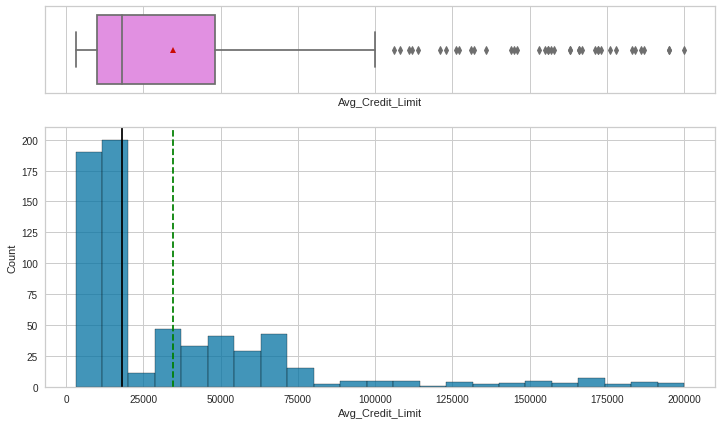

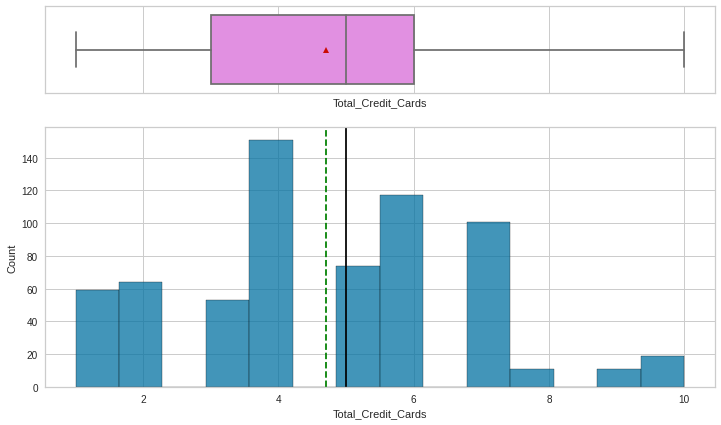

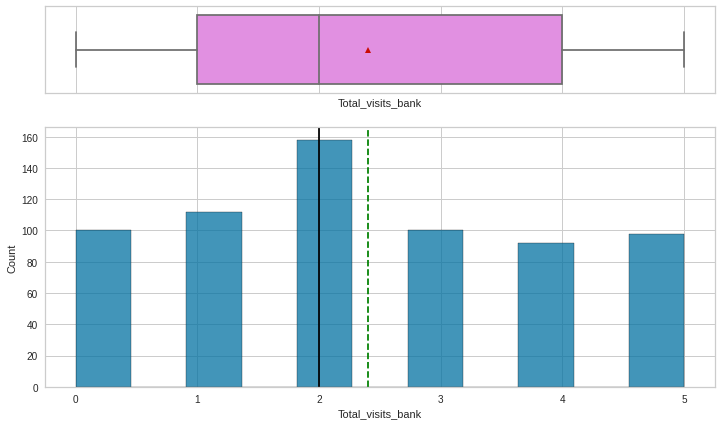

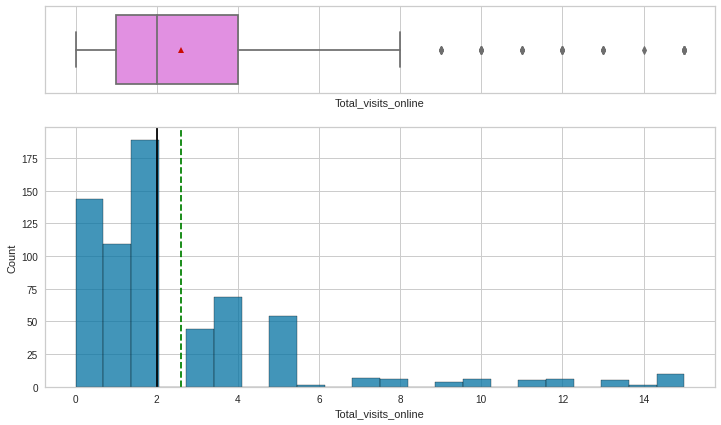

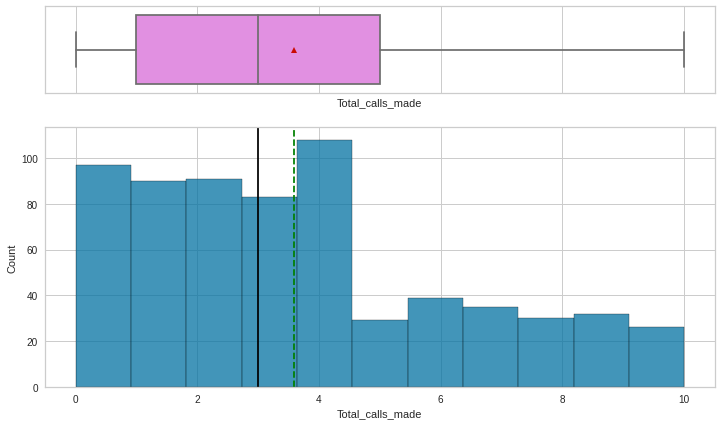

In [ ]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

**Observation**

- Avg Credit limit has lot of outliers
- visits online also has outliers
- Total Call made is right skewed

### **Outlier Determination**

In [ ]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length[0])

num_cols=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for i in num_cols:
    print(i+' variable')
    print('Before log ',frac_outside_1pt5_IQR(df[i])*100)
    print('After log ',frac_outside_1pt5_IQR(np.log(df[i]))*100,'\n')

Avg_Credit_Limit variable
Before log  7.727272727272727
After log  0.45454545454545453 

Total_Credit_Cards variable
Before log  2.878787878787879
After log  8.93939393939394 

Total_visits_bank variable
Before log  0.0
After log  15.151515151515152 

Total_visits_online variable
Before log  7.575757575757576
After log  21.818181818181817 

Total_calls_made variable
Before log  3.939393939393939
After log  14.696969696969697 



/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
#Function to calculate and display outlier values

def outlier_values(df,col):
    ''' 
    Calculate and display outlier values which are > 4*IQR
    '''
    print('Determining outlier values for: ',col)
    quartiles = np.quantile(df[col][df[col].notnull()], [.25, .75])
    col_4iqr = 4 * (quartiles[1] - quartiles[0])
    print(f'\nQ1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {col_4iqr}')
    outlier_vals = df.loc[np.abs(df[col] - df[col].median()) > col_4iqr, col]
    print('\nOutlier values:\n',np.sort(outlier_vals.unique()))
    print('---------------------------------------------------------')

cols=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
for i in cols:
    outlier_values(df,i)

Determining outlier values for:  Avg_Credit_Limit

Q1 = 10000.0, Q3 = 48000.0, 4*IQR = 152000.0

Outlier values:
 [171000 172000 173000 176000 178000 183000 184000 186000 187000 195000
 200000]
---------------------------------------------------------
Determining outlier values for:  Total_Credit_Cards

Q1 = 3.0, Q3 = 6.0, 4*IQR = 12.0

Outlier values:
 []
---------------------------------------------------------
Determining outlier values for:  Total_visits_bank

Q1 = 1.0, Q3 = 4.0, 4*IQR = 12.0

Outlier values:
 []
---------------------------------------------------------
Determining outlier values for:  Total_visits_online

Q1 = 1.0, Q3 = 4.0, 4*IQR = 12.0

Outlier values:
 [15]
---------------------------------------------------------
Determining outlier values for:  Total_calls_made

Q1 = 1.0, Q3 = 5.0, 4*IQR = 16.0

Outlier values:
 []
---------------------------------------------------------


In [ ]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
   
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list): # treat outliers in numerical column of Dataframe
    
    for c in col_list:
        df = treat_outliers(df,c)
        
        
    return df 

In [ ]:
numerical_col = ('Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made')
#Applying outlier treatment
df = treat_outliers_all(df,numerical_col)

**Barplot**

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

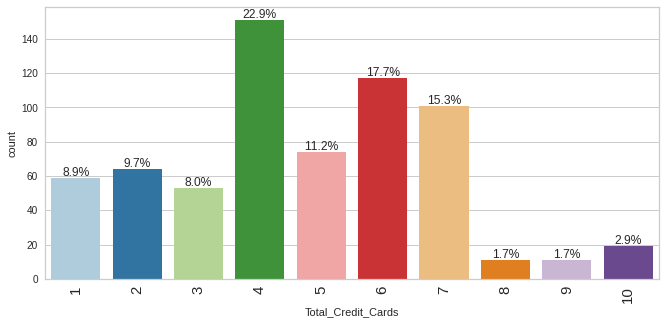

In [ ]:
labeled_barplot(df, "Total_Credit_Cards", perc=True)

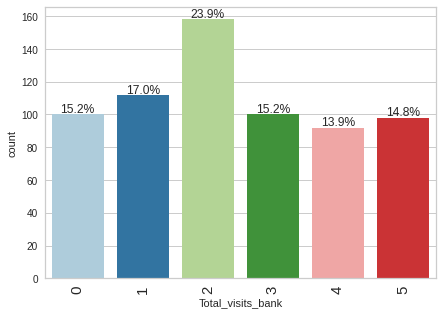

In [ ]:
labeled_barplot(df, "Total_visits_bank", perc=True)

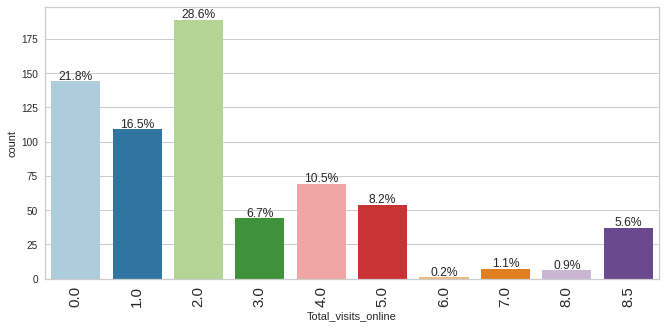

In [ ]:
labeled_barplot(df, "Total_visits_online", perc=True)

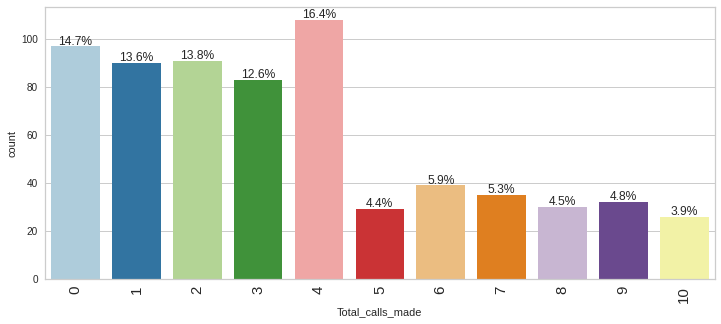

In [ ]:
labeled_barplot(df, "Total_calls_made", perc=True)

**Observation**

- Avg Credit limit is heavily right skewed
- More number of customers with lesser avg credit limits (<20K)
- Credit cards, visits online, total calls have multiple peaks
- majority of customers have 4 credit cards, and then 6 and 7 credit cards. Very few have >=8 cards
- ~160 customers of customers visited bank twice
- majority of customers visited bank online is twice
- majority of customers made <=4 calls to the bank

### **Bivariate Analysis**

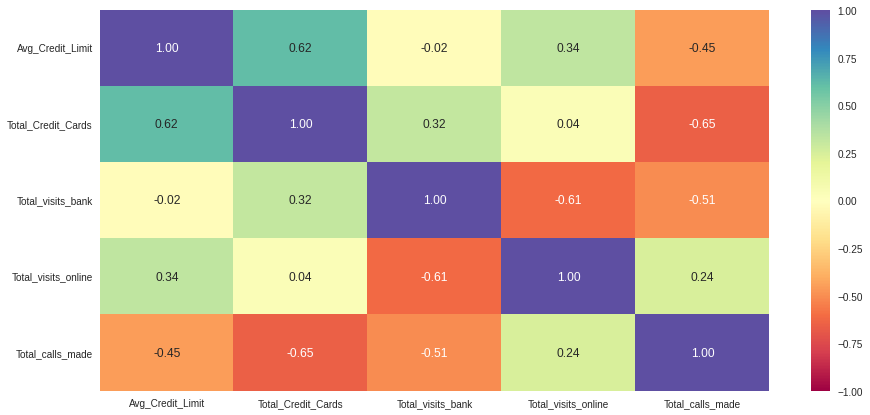

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**observation**
- Avg_Credit_Limit is positively correlated with Total_Credit_Cards
- Total_visits_online which can makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank

**Pairplot of all available numeric columns, hued by Attrition_Flag**

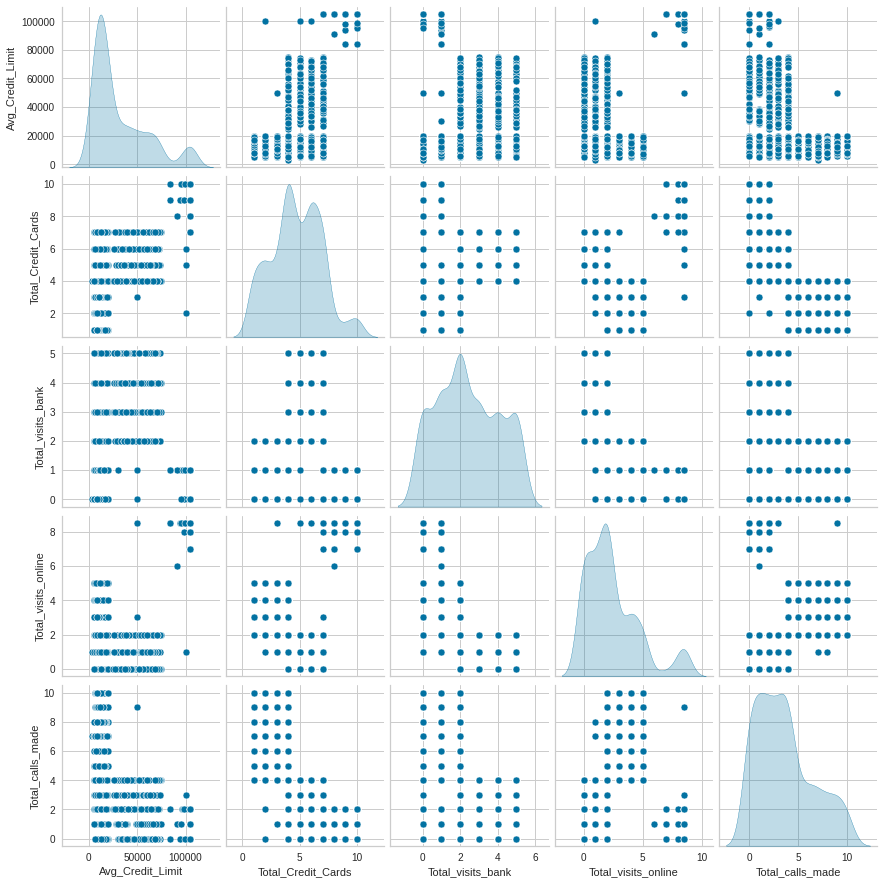

In [ ]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Observations**

From diagonal plots: - we can see 
- "Visits Online" has 4-6 points (mostly) 
- Calls made - shows 2 peaks mostly 
- visits bank - shows 5 peaks 
- credit cards shows 4 peaks

From Bivariate plots: - we can see 
- 2 clusters between credit limit and credit cards 
- 2 clusters between credit limit and visit online 
- 2 clusters between total visits online and credit cards 
- 3 clusters between total visits online and calls made 
- Credit cards and visit online have +ve relationship 
- Credit limits and visit online have +ve relationship 
- Visit bank and visit online have -ve relationship 
- visit to bank and calls made have -ve relationship 
- kind of -ve relationship between credit limit and calls made; credit limits and visit to bank; credit cards and calls made

## K-Means Clustering

In [ ]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.0731463576129583
Number of Clusters: 2 	Average Distortion: 1.4986141501796377
Number of Clusters: 3 	Average Distortion: 1.1823298853410935
Number of Clusters: 4 	Average Distortion: 1.0711026440504199
Number of Clusters: 5 	Average Distortion: 1.0048977741354532
Number of Clusters: 6 	Average Distortion: 0.9519492313650114
Number of Clusters: 7 	Average Distortion: 0.9150335539066776
Number of Clusters: 8 	Average Distortion: 0.8926297549090028


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

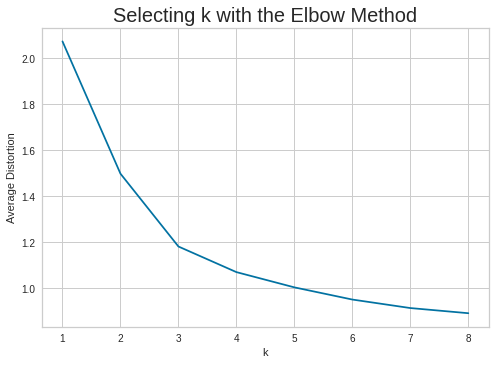

In [ ]:
clusters = range(1, 9)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k)  # Initialize KMeans
    model.fit(subset_scaled_df)  # Fit kMeans on the data
    prediction = model.predict(subset_scaled_df)  # Predict the model on the data
    distortion = (
        sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1))
        / subset_scaled_df.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot

**Observation**

- From the above graph of "Elbow Method", we can find the possible number of clusters. From the graph, we can see the elbow bend at 3.
- we can choose K=3 or K=4
- At k=3 we have an inertia of 50.42 and at K=4 we have 34.23
- Will decide K based on Silhouette score

# **What is silhouette score?**

For n_clusters = 2, silhouette score is 0.4201583924929177
For n_clusters = 3, silhouette score is 0.5169867470092899
For n_clusters = 4, silhouette score is 0.38147048130671246
For n_clusters = 5, silhouette score is 0.35332888701008774
For n_clusters = 6, silhouette score is 0.2710696493583159
For n_clusters = 7, silhouette score is 0.26743115189238703
For n_clusters = 8, silhouette score is 0.25557534676510135
For n_clusters = 9, silhouette score is 0.24417847444991994


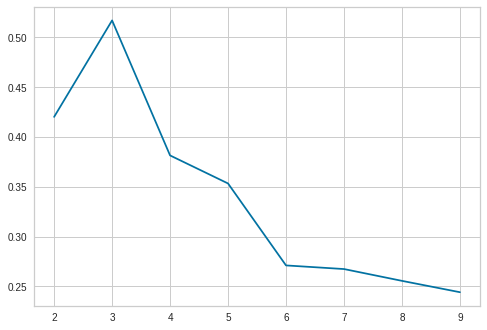

In [ ]:
sil_score = []  # Create empty list
cluster_list = list(range(2, 10))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((subset_scaled_df))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**Observation**

- This visualization is much richer than the previous one: although it confirms that k = 3 is a very good choice, it also underlines the fact that k = 4 is not that good, and much better than k = 6,7, 8,9... This was not visible when comparing inertias.
- At K=3, we have a Sil.Score of 0.51.
- We will take K=3

### How to interpret the results of SilhouetteVisualizer?

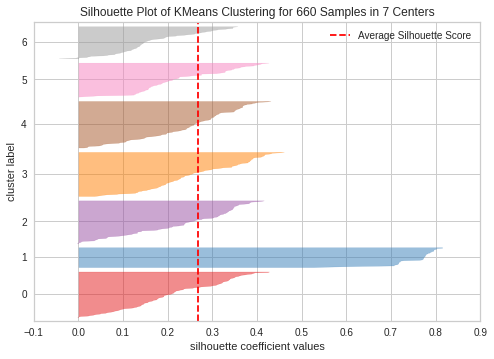

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

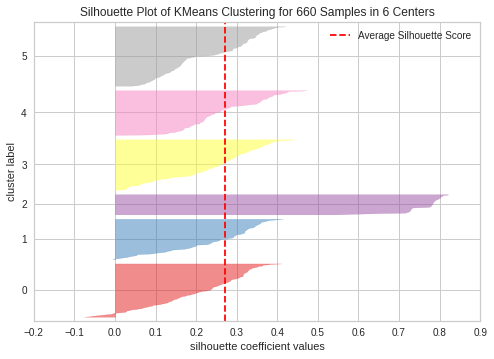

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

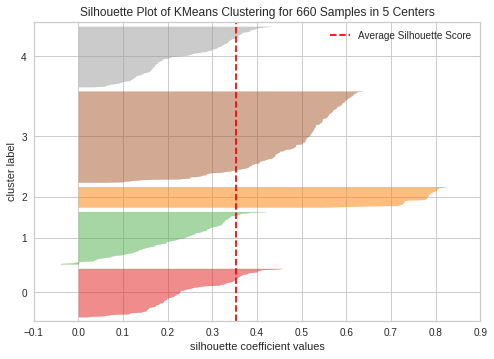

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

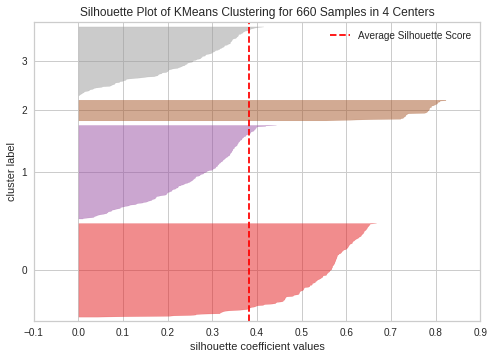

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

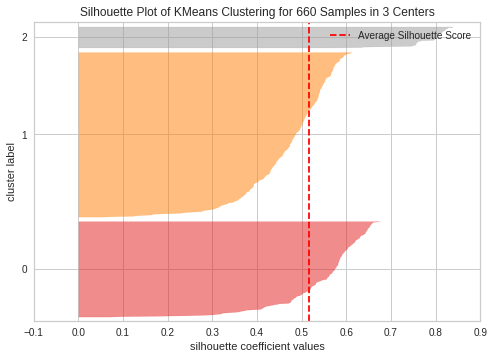

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

**Observation** 
As expected, all three clusters have excellent silhouette scores. Two of the clusters are similar size, with one being quite small.

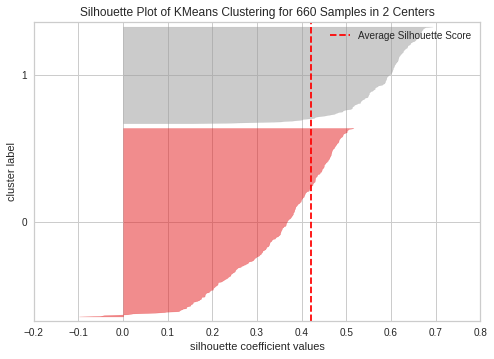

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

**Observation**

- The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters.
- when k = 3, the clusters look good: most instances extend beyond the dashed line, to the right and closer to 1.0, k = 3 has by far the lowest DB score, meaning it has the most distinct and separate clusters.

### Applying KMeans clustering for k=3

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

## **Cluster Profiling**

In [ ]:
cluster_profile = df.groupby("K_means_segments").mean()

In [ ]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.546875,6.870536,224
2,102660.000000,8.740000,0.600000,8.180000,1.080000,50


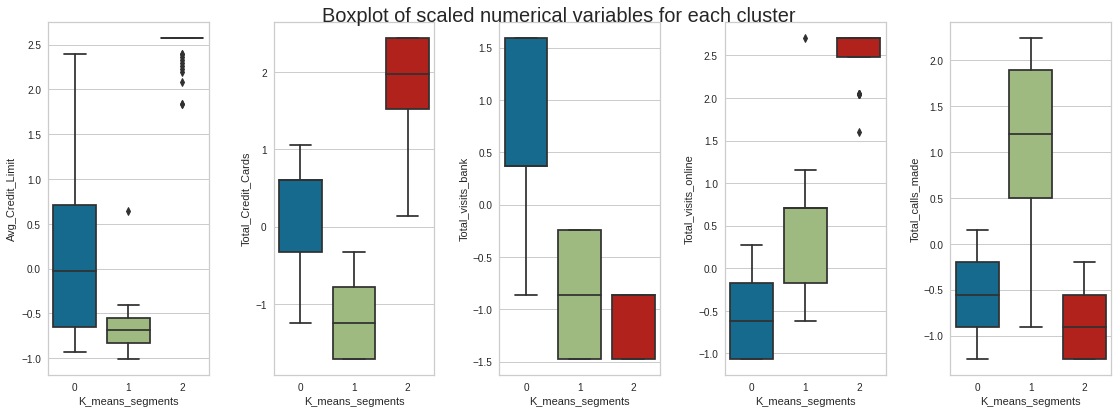

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

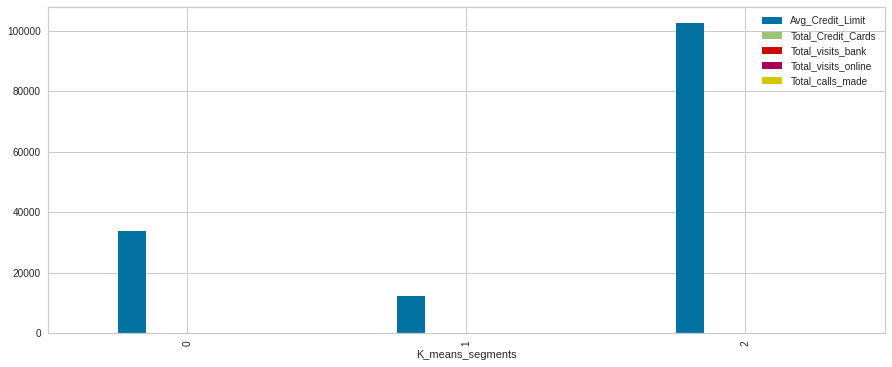

In [ ]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

In [ ]:
pd.crosstab(df.K_means_segments, df.Total_visits_bank).style.highlight_max(
    color="lightgreen", axis=0
)

Total_visits_bank,0,1,2,3,4,5
K_means_segments,,,,,,
0,0,3,93,100,92,98
1,80,79,65,0,0,0
2,20,30,0,0,0,0


In [ ]:
pd.crosstab(df.K_means_segments, df.Total_Credit_Cards).style.highlight_max(
    color="lightgreen", axis=0
)

Total_Credit_Cards,1,2,3,4,5,6,7,8,9,10
K_means_segments,,,,,,,,,,
0,0,1,0,102,73,116,94,0,0,0
1,59,63,53,49,0,0,0,0,0,0
2,0,0,0,0,1,1,7,11,11,19


- If we look at the data we see that there is a group which prefers online interactions with their bank, they have a much higher credit limit and also have more credit cards (cluster - 2)

- The customers who prefer in-person interactions tend to have the mid-range of credit cards and credit limit (cluster - 0).
- The customers who contact via phonecall are in another segment, who have lowest credit limit and number of cards (cluster - 1).

**Observations**

We will consider k=3 to be the optimal number of clusters. This is because:

- The elbow at k=3 was steepest with a huge drop in inertia
- The highest silhouette score was for k=3 by far
- The gap statistic implies k=3 is best
- The DB score also showed k=3 as best
- The cluster distribution for k=3 was subjectively very distinct, especially compared to k=5, which was another consideration.

**From here we see that the three groups are starting to come together. It seems like**

**Group 0: Vocalizers**

- Second largest group
- Very low credit limit
- Low number of credit cards
- Almost never visits the bank or uses online services
- Huge number of calls made

**Group 1: In-Person**

- Largest group
- Mid number of credit cards
- Visits the bank often
- Almost no online usage
- Calls rarely

**Group 2: Online**

- Smallest group, and by a large margine
- Huge credit limit
- Lots of credit cards
- Almost never visits the bank
- Banks online extensively
- Almost never calls

These three groups are defined most sharply by how they interact with the bank, as there is almost no overlap when it comes to their primary interaction variable. For whatever reason, customers seem to overwhelmingly prefer one method of contacting the bank.

# **Hierarchical Clustering**

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

The Agglomerative Clustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.

Average linkage minimizes the average of the distances between all observations of pairs of clusters.

Single linkage minimizes the distance between the closest observations of pairs of clusters.

Source: scikit-learn.org

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

 

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8245251847935283.
Cophenetic correlation for Euclidean distance and complete linkage is 0.835336246667918.
Cophenetic correlation for Euclidean distance and average linkage is 0.9135372845830776.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9086058561741279.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8634644450642049.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7778629438523952.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9107749000055766.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8022608046966394.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.858074859858565.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.19790389062777738.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7961520068553016.
Cophenetic cor

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9135372845830776, which is obtained with Euclidean distance and average linkage.


In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8245251847935283.
Cophenetic correlation for complete linkage is 0.835336246667918.
Cophenetic correlation for average linkage is 0.9135372845830776.
Cophenetic correlation for centroid linkage is 0.9094142754907397.
Cophenetic correlation for ward linkage is 0.7966966681325903.
Cophenetic correlation for weighted linkage is 0.9086058561741279.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9135372845830776, which is obtained with average linkage.


### **Dendograms**
A dendrogram, in general, is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters

**Let's see the dendrograms for the different linkage methods.**

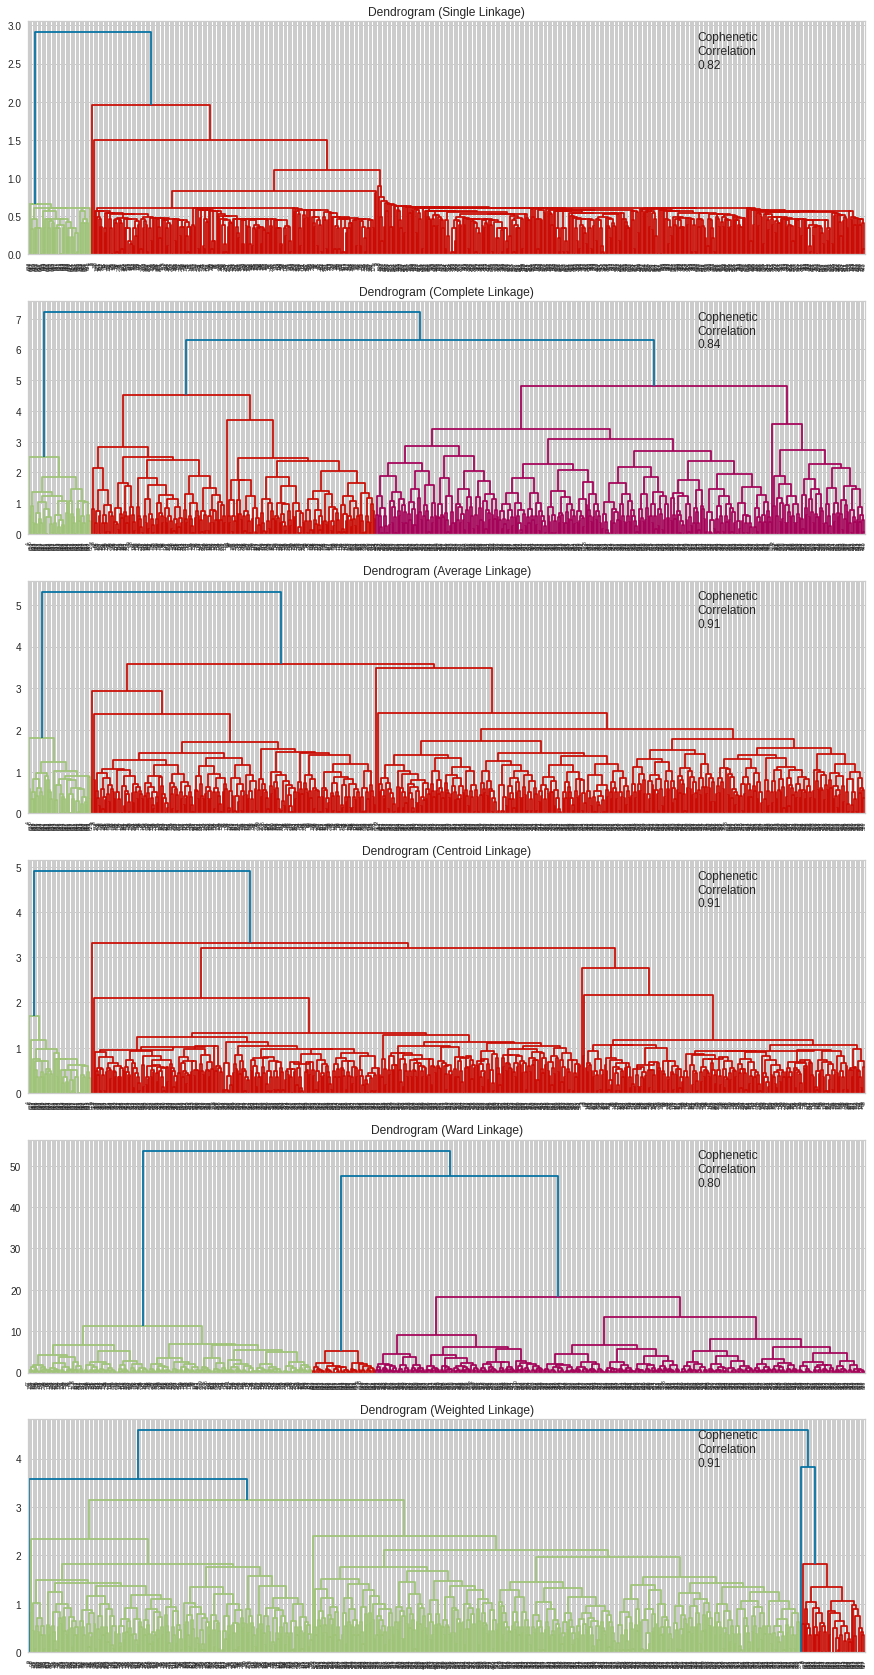

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

Dendrogram with ward linkage method shows distinct and separate cluster compared to other cluster

In [ ]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.824525
1,complete,0.835336
2,average,0.913537
3,centroid,0.909414
4,ward,0.796697
5,weighted,0.908606


**Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).**

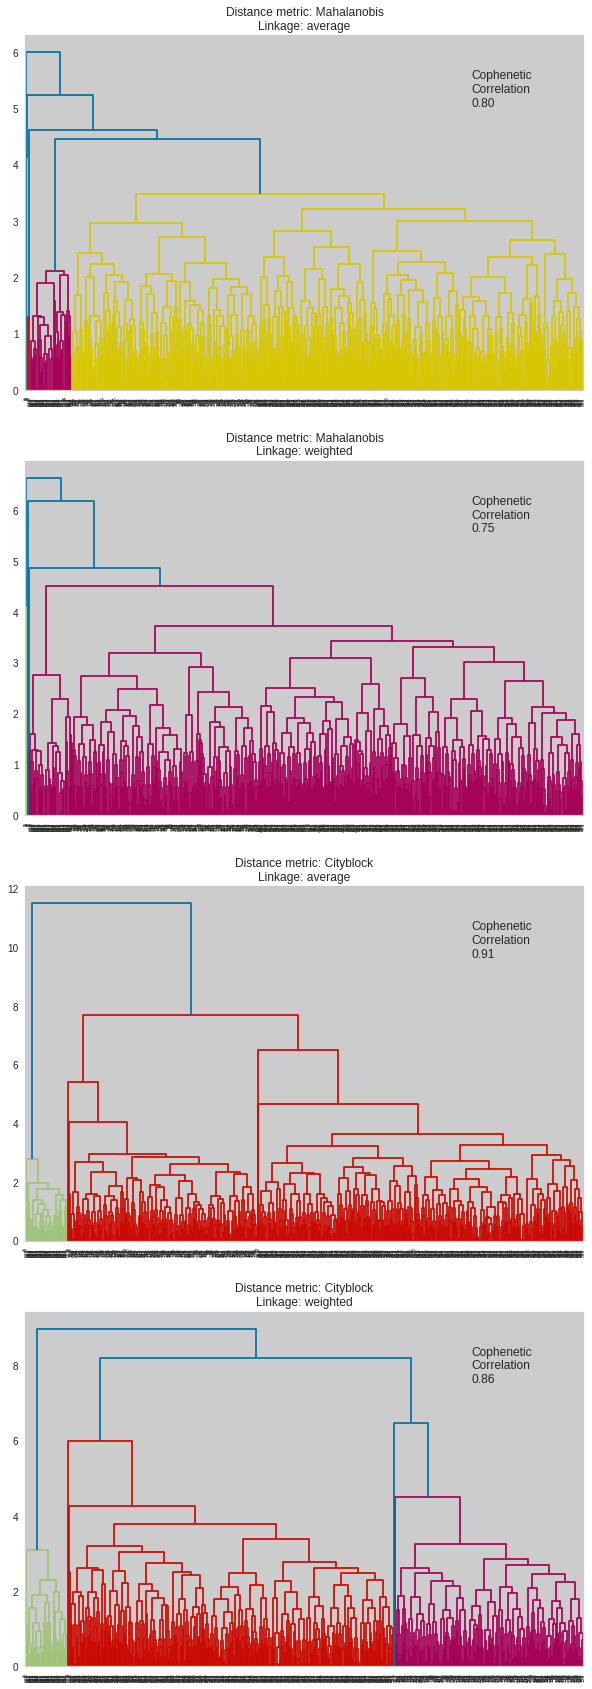

In [ ]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

**Observations**

The cophenetic correlation is highest for average linkage methods. 3 appears to be the appropriate number of clusters from the dendrogram for average linkage.

**Build Agglomerative Clustering model**

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=3)

In [ ]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

# **Cluster Profiling**

In [ ]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,0.000000,386
1,12174.107143,2.410714,0.933036,3.546875,6.870536,1.000000,224
2,102660.000000,8.740000,0.600000,8.180000,1.080000,2.000000,50


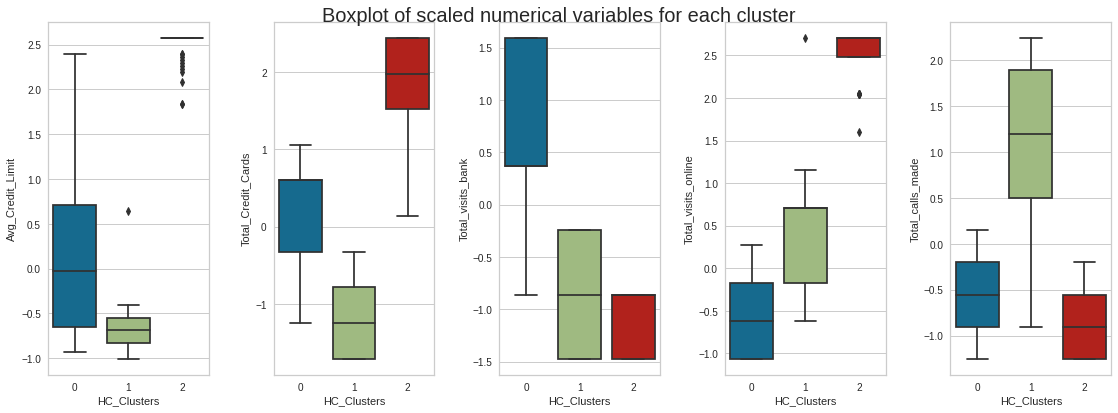

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

- If we look at the data we see that there is a group which prefers online interactions with their bank, they have a much higher credit limit and also have more credit cards (cluster - 1).
- The customers who prefer in-person interactions tend to have the mid-range of credit cards and credit limit (cluster - 0).
- The customers who contact via phonecall are in another segment, who have lowest credit limit and number of cards (cluster - 2).

**Let's compare**

In [ ]:
pd.crosstab(df.HC_Clusters, df.Total_Credit_Cards).style.highlight_max(color="lightgreen", axis=0)

Total_Credit_Cards,1,2,3,4,5,6,7,8,9,10
HC_Clusters,,,,,,,,,,
0,0,1,0,102,73,116,94,0,0,0
1,59,63,53,49,0,0,0,0,0,0
2,0,0,0,0,1,1,7,11,11,19


## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

Although there are only 5 dimensions, it'll be really cool to be able to visualize the clusters at 3 dimensional space without loosing much of the information. Let's use PCA to reduce the dimensions so that 90% of the variance in the data is explained.

In [ ]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=3)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2",'Component 3']
)

In [ ]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.8842694140443247

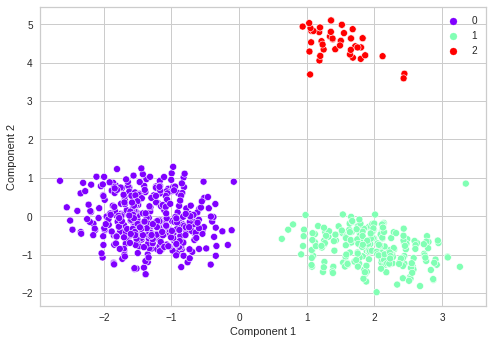

In [ ]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

# **Business Recommendations**

**Comparison Conclusion**

Overall I think the K-means clustering method performed better subjectively. While the second difference was quite uncertain, the first difference was very clear. Thus, while they performed similarly, I prefer K-means on this measure.

The hierarchical method did better slightly quantitatively, with superior a superior silhouette score . However, this advantage was very small.

The current database is extremely small. As it increases in size, the agglomerative clustering method becomes more and more computationally intense. Meanwhile, k-means is appropriate to use even on large amounts of data.

It is thus my opinion that the ever-so-slighty better performance of the agglomerative clustering method does not justify being brought into production for classifying future customers. Its performance is too close to k-means to warrant the extra computing power.

I recommend continuing with the k-means model



# **Actionable insights and Recommendations**

There appears to be three distinct categories of customers:

1. **In-person users:** prefer to handle bank transactions in person. They have the medium number of credit cards and the medium available credit. They are also the most active users.

2. **Phone users:** prefer verbally handling transactions. They have fewest credit cards and lowest credit card limit.

3. **Online users:** prefer digital transactions. They also have the most credit cards and the highest available credit. Least number of customers have this type of behaviour.

The customer preferences should be used to contact the customers. Online/phone users will probably prefer email/text notifications, while in-person users prefer mail notifications and upselling (when at the bank location).

Also, the phone and in-person customers should be reached out to promote online banking.

#### **CONVERT TO HTML**

In [ ]:
! pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! jupyter nbconvert --to html /content/6_Project_Credit_Card_Users_Churn_Prediction_Quazi_Nahida_Sultana.ipynb

[NbConvertApp] Converting notebook /content/6_Project_Credit_Card_Users_Churn_Prediction_Quazi_Nahida_Sultana.ipynb to html
[NbConvertApp] Writing 1735014 bytes to /content/6_Project_Credit_Card_Users_Churn_Prediction_Quazi_Nahida_Sultana.html
